# <center> ML 12th </center>    

 ## <center> abdallah alzoghby
</center>

<h5 style="text-align: center;"> The goal of this project
is to analyze weather conditions using historical data.</h5>
<h4 style="text-align: center;">The importance of weather data is commonly understated although it is one of the first types of data people have analyzed with the goal of forecasting. Though somewhat unclear and nonuniform, weather metrics show correlation between features of historical data and new records, which is what we will be trying to identify.</h4>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

Now, let’s read our data which is present in the ‘weatherHistory.csv’ file

In [63]:
weather_df = pd.read_csv('weatherHistory.csv')

<h1>1-Statistical Analysis&Data Cleaning<h1>

In [64]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Let's print the names of all the columns

In [65]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [66]:
weather_df.shape   

(96453, 12)

In [67]:
weather_df.fillna(method='ffill')
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [68]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


description of each need in the data set, such as (, max min)

In [99]:
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,0.000869,10.862531,-0.000297,-0.000825,0.003597,1003.150038
std,1.002007,10.717812,1.001291,1.001040,0.995629,117.276976
min,-3.533991,-27.716667,-3.759618,-1.563692,-2.468291,0.000000
25%,-0.767263,2.276389,-0.690120,-0.725337,-0.471202,1011.890000
50%,0.010538,12.033333,0.230729,-0.126844,-0.071784,1016.420000
75%,0.723632,18.844444,0.793470,0.480964,1.065021,1021.050000
max,2.928638,39.344444,1.356212,7.672191,1.372265,1046.380000


Count the number of all data in one column

In [70]:
summary_counts = weather_df['Summary'].value_counts()
summary_counts

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

<html><b>Droping UnWanted Columns</b></html>

In [71]:
weather_df['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [72]:
weather_df.drop('Loud Cover',axis=1,inplace=True)
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


using heat map

C:\Users\abdal\AppData\Local\Temp\ipykernel_18540\4137967298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = weather_df.corr()


<Axes: >

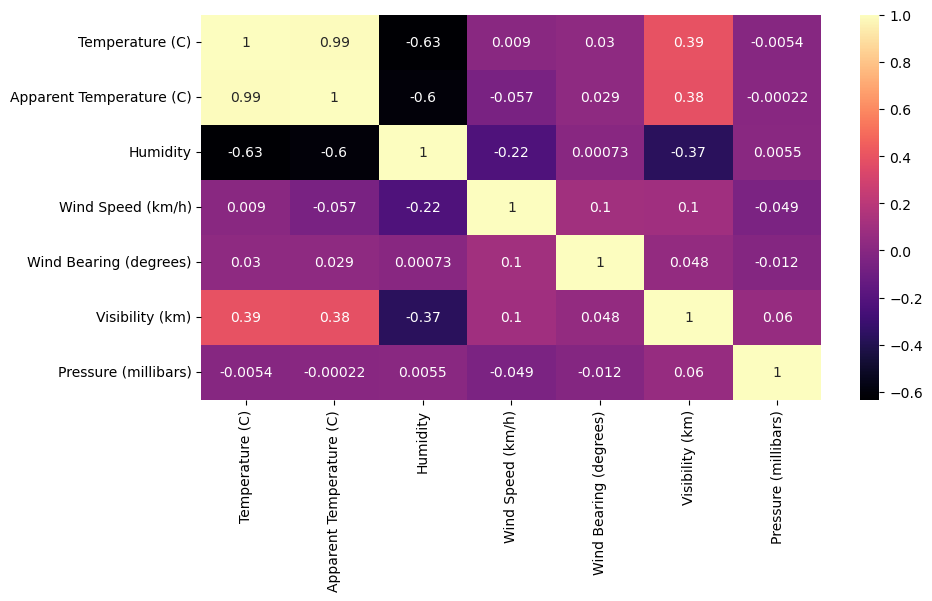

In [73]:
plt.figure(figsize=(10,5))
correlation = weather_df.corr()
sns.heatmap(correlation, cmap='magma', annot=True)

#Remove "Formatted Date" column as it is not neccesary and remove "Daily Summary" as "Summary" exists


In [74]:

weather_df.drop(['Formatted Date','Daily Summary'],axis=1,inplace=True)
weather_df.drop(['Wind Bearing (degrees)'],axis=1,inplace=True)


weather_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,16.1000,1015.95


In [100]:
weather_df.shape


(95936, 8)

It is important to note that our data should not contain any missing value. So, in order to check that, just do this

In [76]:
weather_df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

As it can clearly be seen that the feature — ‘Precip Type’ has 517 null values. Thankfully this feature is of no use to us, so we can simply drop this feature later. Now, let’s checkout how many rows we have and what are the data types does our features have

<h1>2-Visualization<h1>

   <center><b>1-Univariate Exploration</b></center>
   
Univariate exploration refers to the analysis and visualization of a single variable in a dataset
include the(Descriptive statistics,Histogram,Bar charts,Box plots)

   

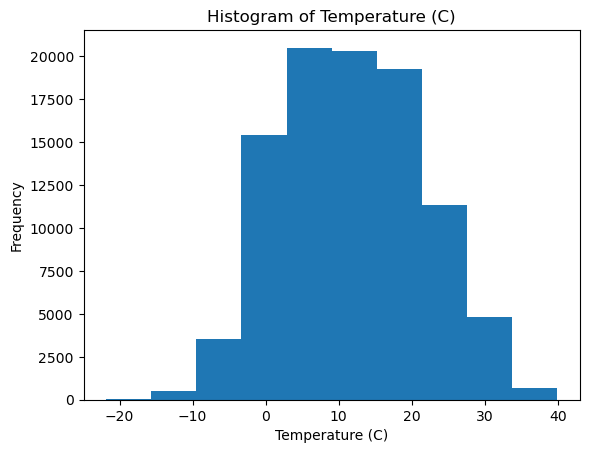

In [77]:
plt.hist(weather_df['Temperature (C)'], bins=10)
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature (C)')
plt.show()

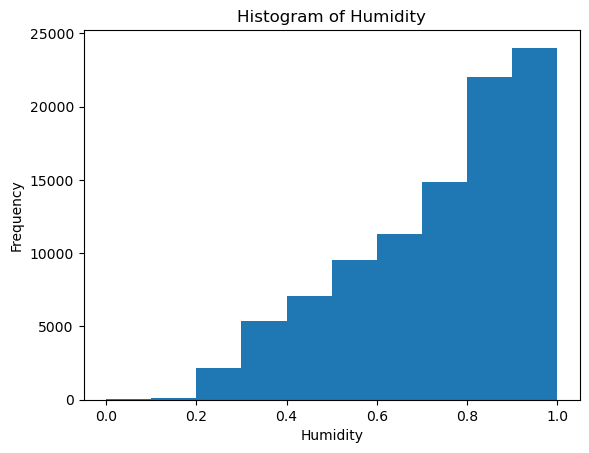

In [78]:
plt.hist(weather_df['Humidity'], bins=10)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')
plt.show()

   <center><b>2-Bivariate Exploration</b></center >
Bivariate exploration allows us to uncover patterns, correlations, dependencies, or trends between two variables
include scatter plots, line plots, bar plots, heatmaps, and correlation analysis

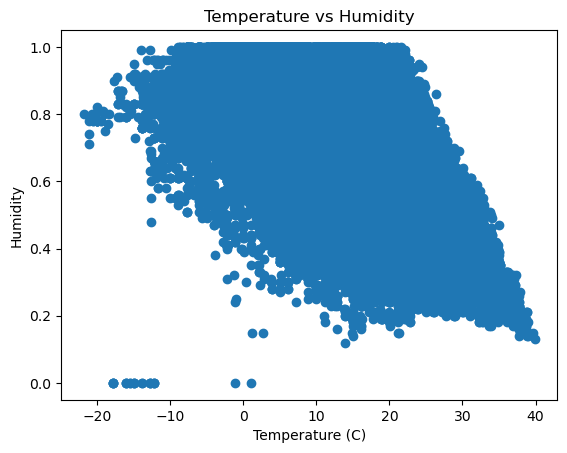

In [79]:
plt.scatter(weather_df['Temperature (C)'], weather_df['Humidity'])
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.show()




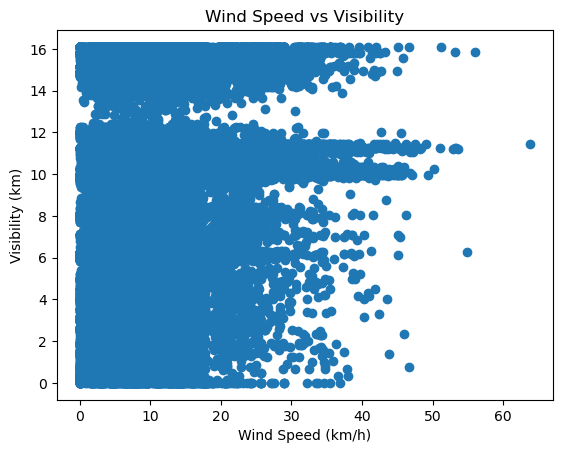

In [80]:

plt.scatter(weather_df['Wind Speed (km/h)'], weather_df['Visibility (km)'])
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Visibility (km)')
plt.title('Wind Speed vs Visibility')
plt.show()

<center><b>3-Multivariate Exploration</b></center>
analysis and visualization of multiple variables or features simultaneously to identify relationships, patterns, and trends among them
include scatter plots, heatmaps, parallel coordinates, pair plots, and correlation matrices

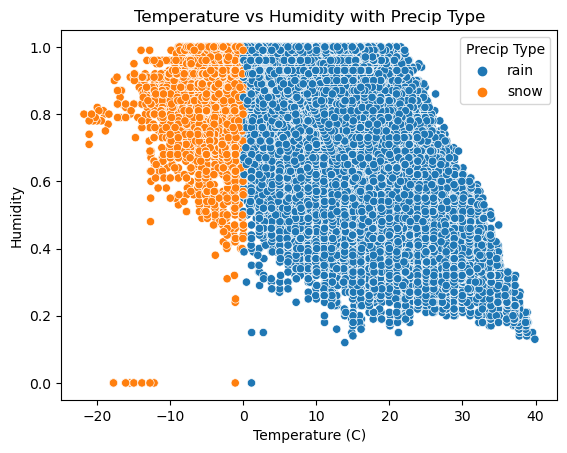

In [81]:
sns.scatterplot(weather_df, x='Temperature (C)', y='Humidity', hue='Precip Type')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity with Precip Type')
plt.show()

<h1>Preprocessing</h1>

  <center> <b>1-Feature normalization</b></center>

In [82]:
features_to_normalize = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']
scaler = StandardScaler()
weather_df[features_to_normalize] = scaler.fit_transform(weather_df[features_to_normalize])
weather_df[features_to_normalize]


,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
0,-0.257599,0.793470,0.478635,1.306976
1,-0.269814,0.639996,0.499594,1.306976
2,-0.267487,0.793470,-0.995473,1.099586
3,-0.381489,0.486521,0.476306,1.306976
4,-0.332631,0.486521,0.033841,1.306976
...,...,...,...,...
96448,1.474532,-1.559811,0.026855,1.372265
96449,1.324468,-1.304020,-0.103556,1.241686
96450,1.058076,-0.894753,-0.264241,1.372265
96451,1.003983,-0.690120,-0.040680,1.372265


<center><b>K-Fold utilization</b></center>

Define the number of folds (K) for cross-validation

In [83]:
k = 5

In [84]:
weather_df.dropna(inplace=True)

X = weather_df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']]
y = weather_df['Precip Type']



 Create K-Fold cross-validator with k=5

In [85]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Iterate over the folds and train/test your model

In [86]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create the scaler
    scaler = StandardScaler()

    # Fit the scaler on the training data
    scaler.fit(X_train)

    # Scale the training and test data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model with scaled data
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Accuracy: 0.9929643527204502
Accuracy: 0.9915046646166675
Accuracy: 0.9925470370563402
Accuracy: 0.9935894094960129
Accuracy: 0.9910877156407985


## Regularization test [LASSO, ELASTIC NET]


### The term "Regularization test [LASSO, Elastic Net]" refers to evaluating the performance of two types of regularization techniques, namely LASSO (Least Absolute Shrinkage and Selection Operator) and Elastic Net, on a given dataset.

### Regularization is a technique used in machine learning to prevent overfitting and improve the generalization of a model.

In [104]:
X = weather_df.dropna(axis=0, subset=['Temperature (C)'], inplace=False)


X = X[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]

y = X['Temperature (C)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Perform Lasso regularization
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_predictions = lasso.predict(X_test_scaled)
lasso_accuracy = lasso.score(X_test_scaled, y_test)
print('Lasso accuracy:', lasso_accuracy)

# Perform Elastic Net regularization+

elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
elastic_net_predictions = elastic_net.predict(X_test_scaled)
elastic_net_accuracy = elastic_net.score(X_test_scaled, y_test)
print('Elastic Net accuracy:', elastic_net_accuracy)


Lasso accuracy: 0.005098271348016659
Elastic Net accuracy: 0.5566856063823516


## compare between  Decision Tree Regression and Random Forest Regression

### 1-Decision Tree Regression

  is a type of regression algorithm that uses a decision tree as its underlying model

In [88]:
# Select the relevant features for the regression
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']

# Drop any rows with missing values
weather_df = weather_df.dropna(subset=features)

# Split the data into training and testing sets
X = weather_df[features]
y = weather_df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Create a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor()

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_score_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Regression:")
print("Mean Squared Error:", mse_decision_tree)
print("R2 Score:", r2_score_decision_tree)


Decision Tree Regression:
Mean Squared Error: 0.012158262816008975
R2 Score: 0.99989404881487


### 2-Random Forest Regression model

In [90]:
# Create a Random Forest Regression model
random_forest_model = RandomForestRegressor()

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_score_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Regression:")
print("Mean Squared Error:", mse_random_forest)
print("R2 Score:", r2_score_random_forest)


Random Forest Regression:
Mean Squared Error: 0.005212420510053868
R2 Score: 0.999954577217256


## the best 

In [95]:
# Compare the models and select the best one
if mse_random_forest < mse_decision_tree and r2_score_random_forest > r2_score_decision_tree:
    print("Random Forest Regression performs better.")
elif mse_decision_tree < mse_random_forest and r2_score_decision_tree > r2_score_random_forest:
    print("Decision Tree Regression performs better.")
else:
    print("Both models perform similarly.")

Random Forest Regression performs better.
